# Honeybee Colonies and Pesticide Use Analysis 

Overview 

Pollination aided through honeybees is integral to crop production and has significant impact on global economy and food security .
value of global crops dependent on pollinators is in the range of US$235 to US$ 577 billion a year1. 
300 % increase in agricultural crop production dependency on pollinator since last 5 decades1.  

However, there has been noticeable decline in honeybee colonies and hive losses or Colony collapse disorder (CCD)
Studies have identified the following internal and external factors 
harmful impact of pesticides, 
Changes in land use and landscape structure, intensive agricultural practices, monocultures1
mite infestations causing deformities in bees or robber bees that are not pollen bearing. 
Climate Change  

Key Questions 

What is the trend in number of colonies, total honey production, yield per colony
Analyze use of pesticides and its impact on number of colonies and yield
 Using machine learning on bee images to distinguish between pollen carrying and non-pollen carrying bees to understand the population composition of bee colonies 

Data has been gathered from Kaggle – 
https://www.kaggle.com/kevinzmith/honey-with-neonic-pesticide/home based on data derived from National Agricultural Statistics Service (NASS) and the United States Geological Survey (USGS)
https://www.kaggle.com/ivanfel/honey-bee-pollen- based on images derived from videos captured at the entrance of a bee colony in June 2017 at the Bee facility of the Gurabo Agricultural Experimental Station of the University of Puerto Rico

References 
References
1. http://www.fao.org/3/I9527EN/i9527en.PDF
2. Ivan Rodriguez, Rémi Mégret, Edgar Acuña, José Agosto, Tugrul Giray. Recognition of pollen-bearing bees from Video using Convolutional Neural Network, IEEE Winter Conf. on Applications of Computer Vision, 2018, Lake Tahoe, NV. https://doi.org/10.1109/WACV.2018.00041


In [2]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from scipy.stats import stats
from scipy.stats import linregress
import seaborn as sns; sns.set()
import seaborn as sns; sns.set()


In [3]:
# Read CSV File 
# Data Source "https://www.kaggle.com/kevinzmith/honey-with-neonic-pesticide/home " 
#sources of the dataset is the National Agricultural Statistics Service (NASS) and 
# the United States Geological Survey (USGS), Honey Production Data 1991-2017 + Neonic pesticides
file = "/Users/richasingh/Desktop/UCIDB_Final_Project/honey-with-neonic-pesticide/vHoneyNeonic_v03.csv"
df = pd.read_csv(file, encoding="ISO-8859-1")

In [4]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
3,AL,18000.0,50,900000.0,99000.0,0.52,468000.0,1994,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,19000.0,45,855000.0,103000.0,0.59,504000.0,1993,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Data Overview for any cleanup requirements
df.count()

state            1132
numcol           1132
yieldpercol      1132
totalprod        1132
stocks           1132
priceperlb       1132
prodvalue        1132
year             1132
StateName        1132
Region           1132
FIPS             1132
nCLOTHIANIDIN     895
nIMIDACLOPRID     895
nTHIAMETHOXAM     895
nACETAMIPRID      895
nTHIACLOPRID      895
nAllNeonic        895
dtype: int64

In [6]:
df.dtypes

state             object
numcol           float64
yieldpercol        int64
totalprod        float64
stocks           float64
priceperlb       float64
prodvalue        float64
year               int64
StateName         object
Region            object
FIPS               int64
nCLOTHIANIDIN    float64
nIMIDACLOPRID    float64
nTHIAMETHOXAM    float64
nACETAMIPRID     float64
nTHIACLOPRID     float64
nAllNeonic       float64
dtype: object

In [7]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
count,1132.000000,1132.000000,1.132000e+03,1.132000e+03,1132.000000,1.132000e+03,1132.000000,1132.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,62452.296820,61.809187,4.317093e+06,1.202020e+06,1.485928,4.932350e+06,2003.698763,30.275618,9260.332067,8944.121564,5293.034749,619.875642,102.432291,24219.796313
std,90698.022209,20.701807,6.962385e+06,2.026242e+06,0.966583,8.551674e+06,7.783332,15.586671,27769.597206,16378.524006,9697.447417,2387.930400,430.409906,47179.176730
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.460000,8.900000e+04,1991.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10000.000000,47.000000,5.192500e+05,1.280000e+05,0.750000,8.137500e+05,1997.000000,18.000000,0.000000,617.250000,0.000000,0.000000,0.000000,923.450000
50%,27000.000000,60.000000,1.607500e+06,4.110000e+05,1.260000,1.936000e+06,2003.000000,30.000000,33.400000,3186.600000,463.200000,0.000000,0.000000,5151.400000
75%,69250.000000,74.000000,4.325000e+06,1.377000e+06,1.920000,4.842500e+06,2010.000000,42.750000,4345.150000,9373.400000,5724.000000,202.600000,0.000000,26130.900000
max,520000.000000,177.000000,4.641000e+07,1.380000e+07,7.860000,8.385900e+07,2017.000000,56.000000,278498.800000,150569.300000,64834.600000,36480.300000,4273.200000,403011.600000


In [8]:
#count of uniques states
count_state = df["state"].value_counts()
count_state 

AL    27
VT    27
MI    27
HI    27
TX    27
IL    27
GA    27
ME    27
CO    27
IN    27
MT    27
MO    27
KS    27
SD    27
TN    27
WA    27
MN    27
PA    27
LA    27
WV    27
IA    27
NY    27
KY    27
AR    27
AZ    27
OH    27
WY    27
NJ    27
FL    27
ID    27
NE    27
UT    27
MS    27
VA    27
CA    27
OR    27
WI    27
NC    27
ND    27
NM    22
NV    18
OK    13
SC    13
MD    13
Name: state, dtype: int64

In [9]:
#Checking for null values
df.isnull().sum()

state              0
numcol             0
yieldpercol        0
totalprod          0
stocks             0
priceperlb         0
prodvalue          0
year               0
StateName          0
Region             0
FIPS               0
nCLOTHIANIDIN    237
nIMIDACLOPRID    237
nTHIAMETHOXAM    237
nACETAMIPRID     237
nTHIACLOPRID     237
nAllNeonic       237
dtype: int64

In [10]:
#drop nah
df.dropna(inplace=True)
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
7,AL,11000.0,56,616000.0,209000.0,1.49,918000.0,2007,Alabama,South,1,7696.2,3258.1,4149.6,0.0,0.0,15103.9
8,AL,11000.0,72,792000.0,230000.0,1.21,958000.0,2006,Alabama,South,1,680.0,4230.2,5371.6,0.0,0.0,10281.8


In [11]:
df.count()

state            895
numcol           895
yieldpercol      895
totalprod        895
stocks           895
priceperlb       895
prodvalue        895
year             895
StateName        895
Region           895
FIPS             895
nCLOTHIANIDIN    895
nIMIDACLOPRID    895
nTHIAMETHOXAM    895
nACETAMIPRID     895
nTHIACLOPRID     895
nAllNeonic       895
dtype: int64

# Statewise Honey Production 

In [12]:
Total_states = df["state"].nunique()
Total_states 

43

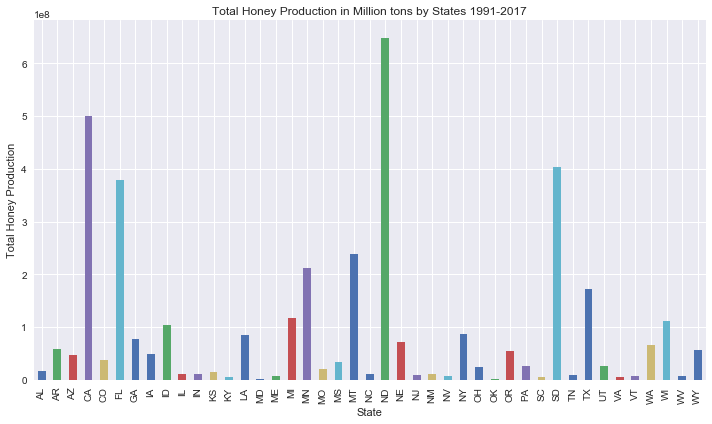

In [13]:
by_state = df.groupby("state")
Total_by_state = by_state["totalprod"].sum()


plt.figure(figsize=(10,6))
total_state = Total_by_state.plot(kind='bar')
total_state.set_title("Total Honey Production in Million tons by States 1991-2017")
total_state.set_xlabel("State")
total_state.set_ylabel("Total Honey Production")

plt.tight_layout()
plt.savefig('/Users/richasingh/Desktop/UCIDB_Final_Project/Images/total_Prod_states.png')
plt.show()

# Regionwise Honey Production and Yield

In [14]:
Total_Regions = df["Region"].nunique()
Total_Regions

4

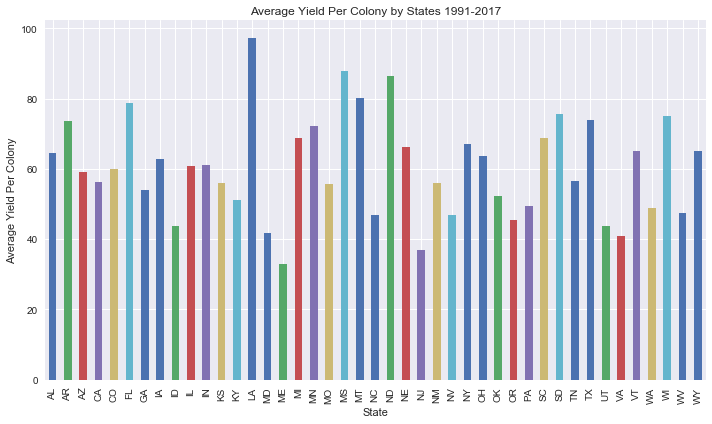

In [15]:
by_state = df.groupby("state")
avg_yield_by_state = by_state["yieldpercol"].mean()

plt.figure(figsize=(10,6))
avg_y_state = avg_yield_by_state.plot(kind='bar')
avg_y_state.set_title("Average Yield Per Colony by States 1991-2017")
avg_y_state.set_xlabel("State")
avg_y_state.set_ylabel("Average Yield Per Colony")

plt.tight_layout()
plt.savefig('/Users/richasingh/Desktop/UCIDB_Final_Project/Images/Avg_yield_states.png')
plt.show()

In [16]:
# Avg Honey yield by regions
by_region = df.groupby("Region")
yield_by_region = by_region["yieldpercol"].mean()
yield_by_region

Region
Midwest      66.935115
Northeast    50.227273
South        63.520690
West         55.158798
Name: yieldpercol, dtype: float64

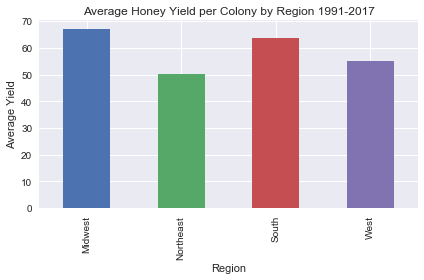

In [17]:
yield_region = yield_by_region.plot(kind='bar')

yield_region.set_title("Average Honey Yield per Colony by Region 1991-2017")
yield_region.set_xlabel("Region")
yield_region.set_ylabel("Average Yield")

plt.tight_layout()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/yield_region.png")
plt.show() 

In [18]:
# Total honey production  by regions
Total_by_region = by_region["totalprod"].sum()
Total_by_region

Region
Midwest      1.694332e+09
Northeast    1.353810e+08
South        8.647990e+08
West         1.147377e+09
Name: totalprod, dtype: float64

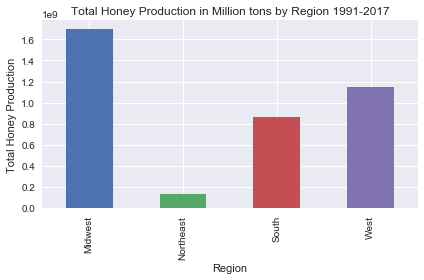

In [19]:
total_region = Total_by_region.plot(kind='bar')

total_region.set_title("Total Honey Production in Million tons by Region 1991-2017")
total_region.set_xlabel("Region")
total_region.set_ylabel("Total Honey Production")

plt.tight_layout()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/total_prod_region.png")
plt.show()

In [20]:
# Total share in honey production  by regions
 
Total_honey_all = df["totalprod"].sum()

percent_region = Total_by_region/Total_honey_all*100 
percent_region

Region
Midwest      44.101534
Northeast     3.523813
South        22.509734
West         29.864918
Name: totalprod, dtype: float64

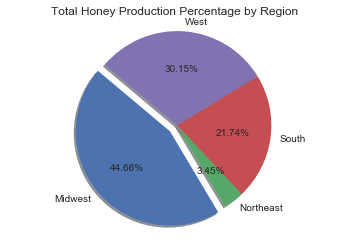

In [21]:
labels = ["Midwest", "Northeast", "South", "West"]

# The values of each section of the pie chart
sizes = [44.66, 3.45, 21.74, 30.15]

explode = (0.1, 0, 0, 0)
plt.title("Total Honey Production Percentage by Region")
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.2f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/total_honey_pie.png")
plt.show()

In [22]:
# Honey Production Trends by regions
# total production
by_year_region = df.groupby(["Region", "year"])

total_by_year = by_year_region["totalprod"].sum()
 
total_by_year = pd.DataFrame(total_by_year).reset_index()
 
df_MW = total_by_year[(total_by_year.Region == "Midwest")]
df_NE = total_by_year[(total_by_year.Region == "Northeast")]
df_sth = total_by_year[(total_by_year.Region == "South")]
df_west = total_by_year[(total_by_year.Region == "West")]
df_west.head() 

,Region,year,totalprod
67,West,1994,41992000.0
68,West,1995,70541000.0
69,West,1996,56454000.0
70,West,1997,68849000.0
71,West,1998,73562000.0


In [23]:
# Average Yield
by_year_region = df.groupby(["Region", "year"])

total_yield_by_year = by_year_region["yieldpercol"].mean()
 
total_yield_by_year = pd.DataFrame(total_yield_by_year).reset_index()
 
df_MW_yield = total_yield_by_year[(total_yield_by_year.Region == "Midwest")]
df_NE_yield = total_yield_by_year[(total_yield_by_year.Region == "Northeast")]
df_sth_yield = total_yield_by_year[(total_yield_by_year.Region == "South")]
df_west_yield = total_yield_by_year[(total_yield_by_year.Region == "West")]
df_west_yield.head() 

,Region,year,yieldpercol
67,West,1994,59.833333
68,West,1995,57.636364
69,West,1996,62.090909
70,West,1997,66.727273
71,West,1998,63.818182


# Trends in yield and total honey production by regions 

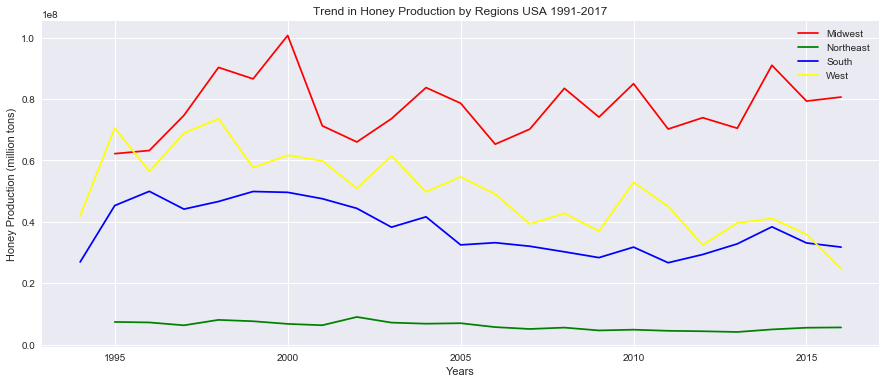

In [24]:
# Time series by region Total Honey Production

plt.figure(figsize=(15,6)) 
Midwest, = plt.plot(df_MW['year'], df_MW['totalprod'], color="red", label="Midwest" )
Northeast,= plt.plot(df_NE['year'], df_NE['totalprod'], color="green", label="Northeast" )
South, = plt.plot(df_sth['year'], df_sth['totalprod'], color="blue" ,label= "South" )
West, = plt.plot(df_west['year'], df_west['totalprod'], color="yellow", label ="West")
plt.title('Trend in Honey Production by Regions USA 1991-2017')
plt.ylabel('Honey Production (million tons)')
plt.xlabel('Years')
plt.legend(handles=[Midwest, Northeast, South, West], loc="best");
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/total_honey_region_trend.png")
plt.show()
 
 

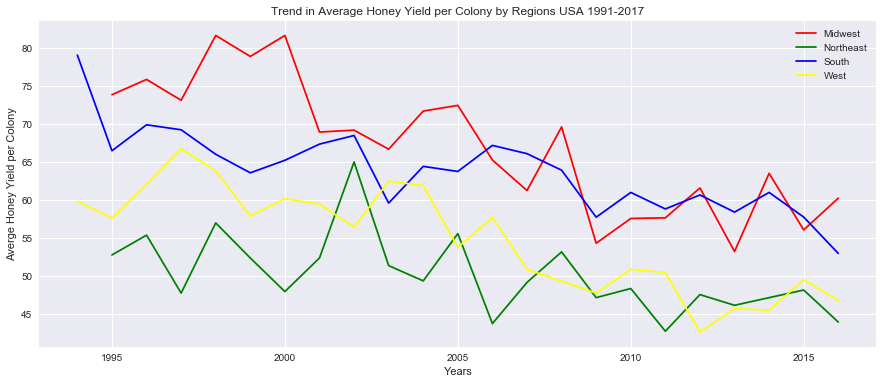

In [25]:
# Time trend by region 

plt.figure(figsize=(15,6)) 
Midwesty, = plt.plot(df_MW_yield['year'], df_MW_yield['yieldpercol'], color="red", label="Midwest" )
Northeasty,= plt.plot(df_NE_yield['year'], df_NE_yield['yieldpercol'], color="green", label="Northeast" )
Southy, = plt.plot(df_sth_yield['year'], df_sth_yield['yieldpercol'], color="blue" ,label= "South" )
Westy, = plt.plot(df_west_yield['year'], df_west_yield['yieldpercol'], color="yellow", label ="West")
plt.title('Trend in Average Honey Yield per Colony by Regions USA 1991-2017')
plt.ylabel('Averge Honey Yield per Colony')
plt.xlabel('Years')
plt.legend(handles=[Midwesty, Northeasty, Southy, Westy], loc="best");
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/Yield_honey_region_trend.png")
plt.show()

# Trends in price of honey 

In [26]:
# Average price by region and time 

avg_price_by_region = by_region["priceperlb"].mean()

avg_price_by_region_time = by_year_region["priceperlb"].mean()

avg_price_by_region_time = pd.DataFrame(avg_price_by_region_time).reset_index()

df_MW_price = avg_price_by_region_time[(avg_price_by_region_time.Region == "Midwest")]
df_NE_price = avg_price_by_region_time[(avg_price_by_region_time.Region == "Northeast")]
df_sth_price = avg_price_by_region_time[(avg_price_by_region_time.Region == "South")]
df_west_price = avg_price_by_region_time[(avg_price_by_region_time.Region == "West")]
df_west_price.head() 
 
 

,Region,year,priceperlb
67,West,1994,0.613333
68,West,1995,0.716364
69,West,1996,0.894545
70,West,1997,0.796364
71,West,1998,0.775455


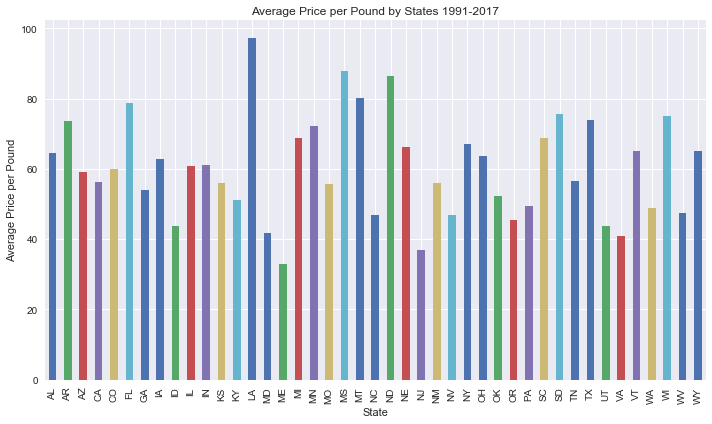

In [27]:
by_state = df.groupby("state")
avg_price_by_state = by_state["priceperlb"].mean()

plt.figure(figsize=(10,6))
avg_pr_state = avg_yield_by_state.plot(kind='bar')
avg_pr_state.set_title("Average Price per Pound by States 1991-2017")
avg_pr_state.set_xlabel("State")
avg_pr_state.set_ylabel("Average Price per Pound")

plt.tight_layout()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/price_state.png")
plt.show()

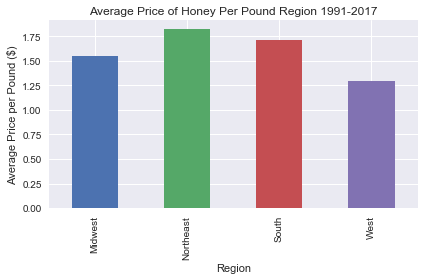

In [28]:
price_region = avg_price_by_region.plot(kind='bar')

price_region.set_title("Average Price of Honey Per Pound Region 1991-2017")
price_region.set_xlabel("Region")
price_region.set_ylabel("Average Price per Pound ($)")

plt.tight_layout()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/price_region.png")
plt.show()

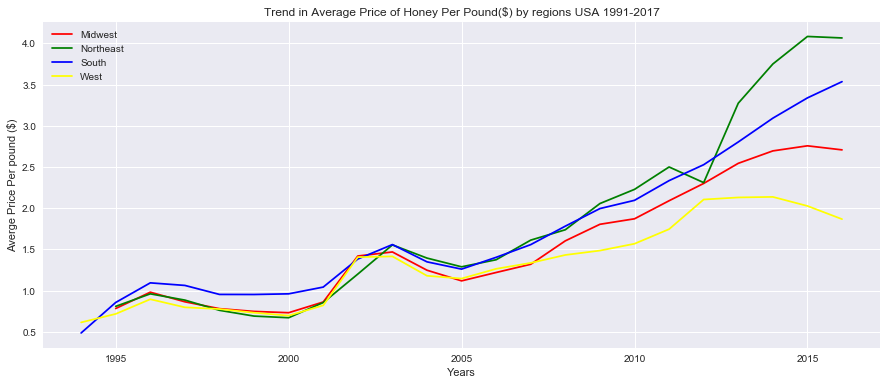

In [29]:
# Time trend by region 

plt.figure(figsize=(15,6)) 
Midwestp, = plt.plot(df_MW_price['year'], df_MW_price['priceperlb'], color="red", label="Midwest" )
Northeastp,= plt.plot(df_NE_price['year'], df_NE_price['priceperlb'], color="green", label="Northeast" )
Southp, = plt.plot(df_sth_price['year'], df_sth_price['priceperlb'], color="blue" ,label= "South" )
Westp, = plt.plot(df_west_price['year'], df_west_price['priceperlb'], color="yellow", label ="West")
plt.title('Trend in Average Price of Honey Per Pound($) by regions USA 1991-2017')
plt.ylabel('Averge Price Per pound ($)')
plt.xlabel('Years')
plt.legend(handles=[Midwestp, Northeastp, Southp, Westp], loc="best");

plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/price_honey_region_trend.png")
plt.show()

# Trend in Neonic Pesticides 

In [30]:
# Average price by region and time 

total_pest_by_region = by_region["nAllNeonic"].sum()

avg_pest_by_region = by_region["nAllNeonic"].mean()

avg_pest_by_region_time = by_year_region["nAllNeonic"].mean()

avg_pest_by_region_time = pd.DataFrame(avg_pest_by_region_time).reset_index()

df_MW_pest = avg_pest_by_region_time[(avg_pest_by_region_time.Region == "Midwest")]
df_NE_pest = avg_pest_by_region_time[(avg_pest_by_region_time.Region == "Northeast")]
df_sth_pest = avg_pest_by_region_time[(avg_pest_by_region_time.Region == "South")]
df_west_pest = avg_pest_by_region_time[(avg_pest_by_region_time.Region == "West")]
df_west_pest.head() 

,Region,year,nAllNeonic
67,West,1994,1019.550000
68,West,1995,3823.100000
69,West,1996,4410.718182
70,West,1997,10348.463636
71,West,1998,8826.781818


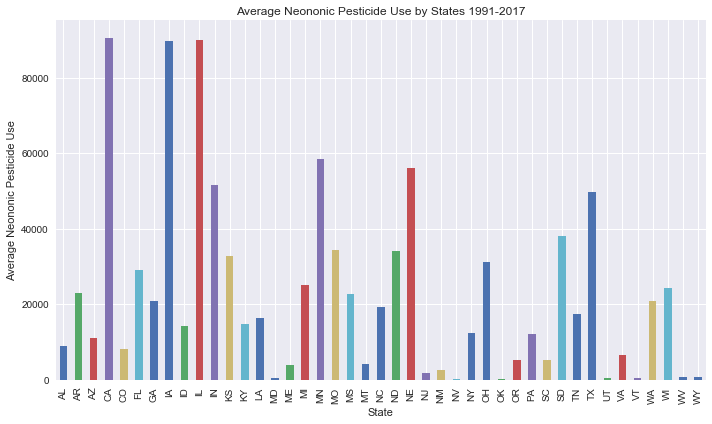

In [31]:
by_state = df.groupby("state")
avg_pest_by_state = by_state["nAllNeonic"].mean()
 

plt.figure(figsize=(10,6))
pest_by_state = avg_pest_by_state.plot(kind='bar')
pest_by_state.set_title("Average Neononic Pesticide Use by States 1991-2017")
pest_by_state.set_xlabel("State")
pest_by_state.set_ylabel("Average Neononic Pesticide Use")


plt.tight_layout()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/neononic_use_state.png",bbox_inches='tight')
plt.show()

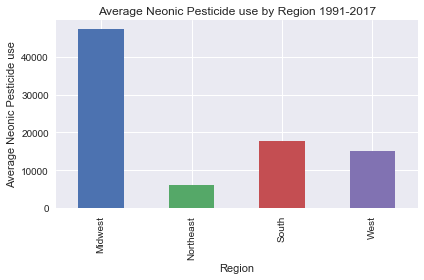

In [32]:
pest_region = avg_pest_by_region.plot(kind='bar')

pest_region.set_title("Average Neonic Pesticide use by Region 1991-2017")
pest_region.set_xlabel("Region")
pest_region.set_ylabel("Average Neonic Pesticide use")

plt.tight_layout()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/neononic_use_region.png")
plt.show()

In [33]:
Total_pest_all = df["nAllNeonic"].sum()

percent_region_pest = total_pest_by_region/Total_pest_all*100 
percent_region_pest

Region
Midwest      57.066580
Northeast     3.107176
South        23.711719
West         16.114525
Name: nAllNeonic, dtype: float64

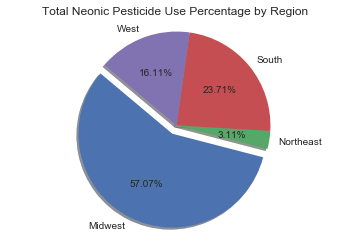

In [34]:
labels = ["Midwest", "Northeast", "South", "West"]

# The values of each section of the pie chart
sizes = [57.07, 3.11, 23.71, 16.11]

explode = (0.1, 0, 0, 0)
plt.title("Total Neonic Pesticide Use Percentage by Region")
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.2f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/total_pest_pie.png")
plt.show()

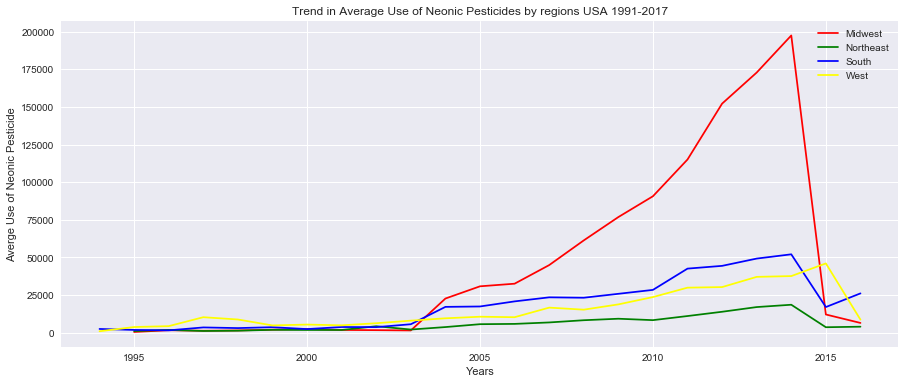

In [35]:
# Time trend by region 
plt.figure(figsize=(15,6)) 
Midwestpest, = plt.plot(df_MW_pest['year'], df_MW_pest['nAllNeonic'], color="red", label="Midwest" )
Northeastpest,= plt.plot(df_NE_pest['year'], df_NE_pest['nAllNeonic'], color="green", label="Northeast" )
Southpest, = plt.plot(df_sth_pest['year'], df_sth_pest['nAllNeonic'], color="blue" ,label= "South" )
Westpest, = plt.plot(df_west_pest['year'], df_west_pest['nAllNeonic'], color="yellow", label ="West")
plt.title('Trend in Average Use of Neonic Pesticides by regions USA 1991-2017')
plt.ylabel('Averge Use of Neonic Pesticide')
plt.xlabel('Years')
plt.legend(handles=[Midwestpest, Northeastpest, Southpest, Westpest], loc="best");

plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/pest_honey_region_trend.png")
plt.show()

In [36]:
# Number of Colonies
by_state = df.groupby("state")
Total_col_by_state = by_state["numcol"].sum()

Total_col_by_state.head()

state
AL     245000.0
AR     759000.0
AZ     759000.0
CA    8655000.0
CO     612000.0
Name: numcol, dtype: float64

In [37]:
Total_col_by_region_time = by_year_region["numcol"].sum()

Total_col_by_region_time = pd.DataFrame(Total_col_by_region_time).reset_index()

df_MW_col = Total_col_by_region_time[(Total_col_by_region_time.Region == "Midwest")]
df_NE_col = Total_col_by_region_time[(Total_col_by_region_time.Region == "Northeast")]
df_sth_col = Total_col_by_region_time[(Total_col_by_region_time.Region == "South")]
df_west_col = Total_col_by_region_time[(Total_col_by_region_time.Region == "West")]
df_west_col.head()

time = df["year"].min()
time

1994

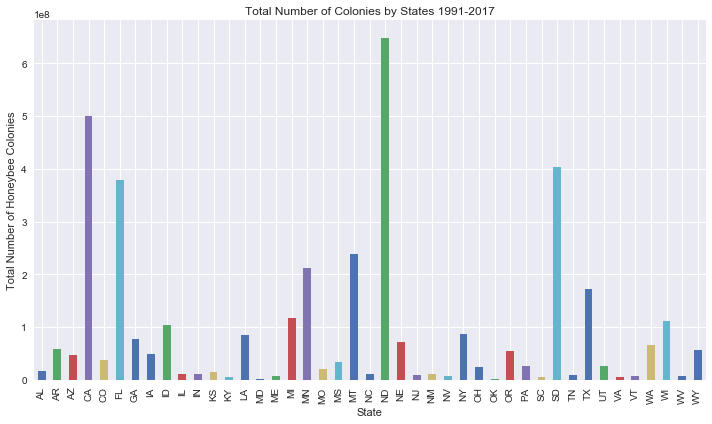

In [38]:
plt.figure(figsize=(10,6))
total_col_state = Total_by_state.plot(kind='bar')
total_col_state.set_title("Total Number of Colonies by States 1991-2017")
total_col_state.set_xlabel("State")
total_col_state.set_ylabel("Total Number of Honeybee Colonies")

plt.tight_layout()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/Col_state.png")
plt.show()

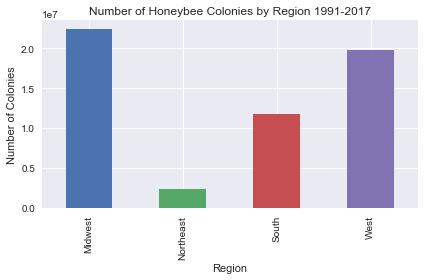

In [39]:
Total_col_by_region = by_region["numcol"].sum()
col_region = Total_col_by_region.plot(kind='bar')

col_region.set_title("Number of Honeybee Colonies by Region 1991-2017")
col_region.set_xlabel("Region")
col_region.set_ylabel("Number of Colonies")

plt.tight_layout()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/col_region.png")
plt.show()

In [40]:
Total_col_all = df["numcol"].sum()

percent_region_col = Total_col_by_region/Total_col_all*100 
percent_region_col

Region
Midwest      39.814255
Northeast     4.191723
South        20.853646
West         35.140376
Name: numcol, dtype: float64

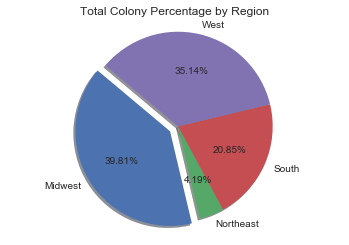

In [41]:
labels = ["Midwest", "Northeast", "South", "West"]

# The values of each section of the pie chart
sizes = [39.81, 4.19, 20.85, 35.14]

explode = (0.1, 0, 0, 0)
plt.title("Total Colony Percentage by Region")
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.2f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/total_col_pie.png")
plt.show()

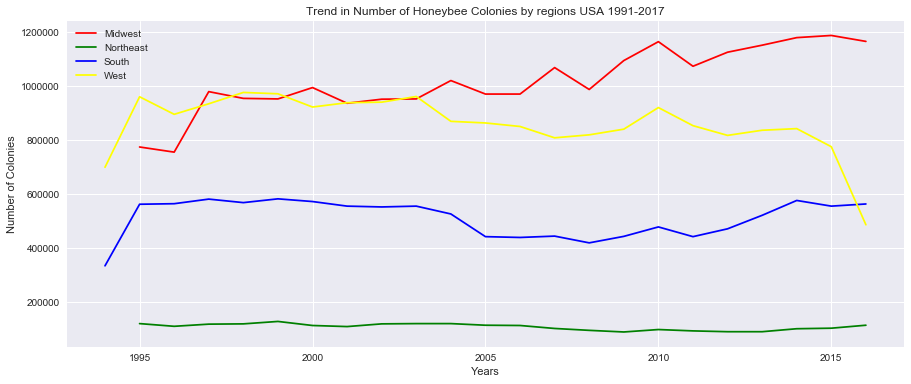

<Figure size 432x288 with 0 Axes>

In [42]:
# Time trend by region 
plt.figure(figsize=(15,6)) 
Midwestcol, = plt.plot(df_MW_col['year'], df_MW_col['numcol'], color="red", label="Midwest" )
Northeastcol,= plt.plot(df_NE_col['year'], df_NE_col['numcol'], color="green", label="Northeast" )
Southcol, = plt.plot(df_sth_col['year'], df_sth_col['numcol'], color="blue" ,label= "South" )
Westcol, = plt.plot(df_west_col['year'], df_west_col['numcol'], color="yellow", label ="West")
plt.title('Trend in Number of Honeybee Colonies by regions USA 1991-2017')
plt.ylabel('Number of Colonies')
plt.xlabel('Years')
plt.legend(handles=[Midwestcol, Northeastcol, Southcol, Westcol], loc="best");
plt.show()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/col_honey_region_trend.png")

# Relationship Analysis 

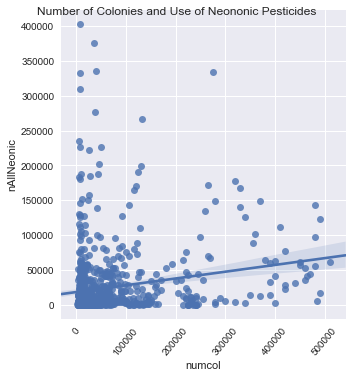

In [104]:
cp = sns.lmplot('numcol', 'nAllNeonic', data=df, fit_reg=True)

cp.set_xticklabels(rotation=50)
cp.fig.suptitle('Number of Colonies and Use of Neononic Pesticides')
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/Col_Vs_Pesticides.png")

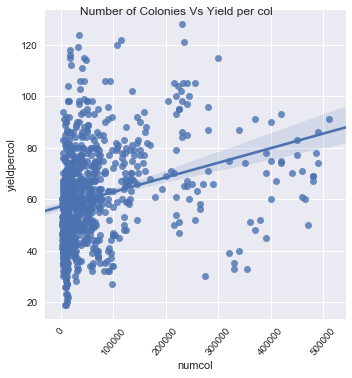

In [105]:
cy = sns.lmplot('numcol', 'yieldpercol', data=df, fit_reg=True)

cy.set_xticklabels(rotation=50)
cy.fig.suptitle('Number of Colonies Vs Yield per col')
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/Col_Vs_Yield.png")

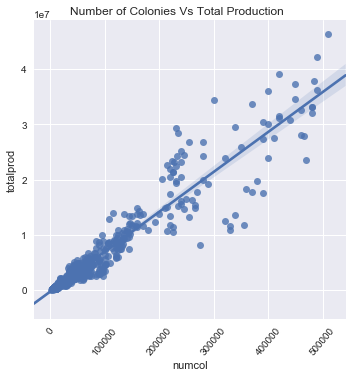

In [106]:
ct = sns.lmplot('numcol', 'totalprod', data=df , fit_reg=True)

ct.set_xticklabels(rotation=50)
ct.fig.suptitle('Number of Colonies Vs Total Production')
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/Col_Vs_TotProd.png")

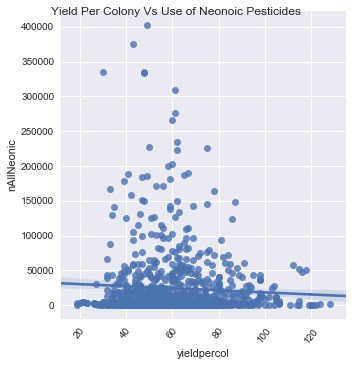

In [107]:
yp = sns.lmplot('yieldpercol', 'nAllNeonic', data=df , fit_reg=True)

yp.set_xticklabels(rotation=50)
yp.fig.suptitle('Yield Per Colony Vs Use of Neonoic Pesticides')
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/Yield_Vs_pest.png")

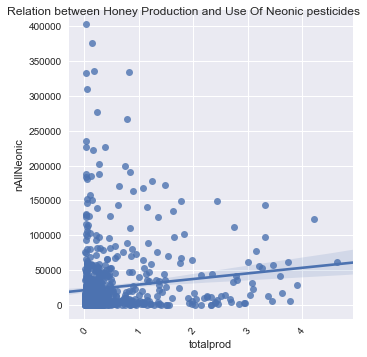

In [108]:
pest_total = sns.lmplot('totalprod', 'nAllNeonic', data=df, fit_reg=True)

pest_total.set_xticklabels(rotation=50)
pest_total.fig.suptitle('Relation between Honey Production and Use Of Neonic pesticides')
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/total_Vs_pest.png")

In [46]:
# Correlation Analysis 
corr = df.corr()
corr

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
numcol,1.000000,0.279088,0.955114,0.821658,-0.203135,0.889086,0.018017,-0.116882,0.022015,0.409895,0.092107,0.318224,-0.032633,0.189996
yieldpercol,0.279088,1.000000,0.435267,0.402141,-0.375624,0.292084,-0.261311,-0.078716,-0.048182,-0.081020,0.021389,-0.116265,-0.105431,-0.058936
totalprod,0.955114,0.435267,1.000000,0.867106,-0.231405,0.882415,-0.044383,-0.077540,0.002455,0.274404,0.068303,0.165876,-0.055876,0.118631
stocks,0.821658,0.402141,0.867106,1.000000,-0.257812,0.714838,-0.079300,0.021972,0.001051,0.160943,0.029506,0.114871,-0.019246,0.068194
priceperlb,-0.203135,-0.375624,-0.231405,-0.257812,1.000000,-0.038741,0.743497,0.110133,0.262087,0.198470,0.261383,0.041519,0.109933,0.279994
prodvalue,0.889086,0.292084,0.882415,0.714838,-0.038741,1.000000,0.196882,-0.031397,0.104103,0.357058,0.215125,0.217413,-0.007690,0.240381
year,0.018017,-0.261311,-0.044383,-0.079300,0.743497,0.196882,1.000000,0.016700,0.315925,0.354881,0.467843,0.169439,0.179026,0.415524
FIPS,-0.116882,-0.078716,-0.077540,0.021972,0.110133,-0.031397,0.016700,1.000000,-0.081233,-0.264478,-0.085272,-0.084765,0.142158,-0.160150
nCLOTHIANIDIN,0.022015,-0.048182,0.002455,0.001051,0.262087,0.104103,0.315925,-0.081233,1.000000,0.510284,0.750403,0.019093,-0.009031,0.920872
nIMIDACLOPRID,0.409895,-0.081020,0.274404,0.160943,0.198470,0.357058,0.354881,-0.264478,0.510284,1.000000,0.534640,0.542934,-0.018258,0.784714


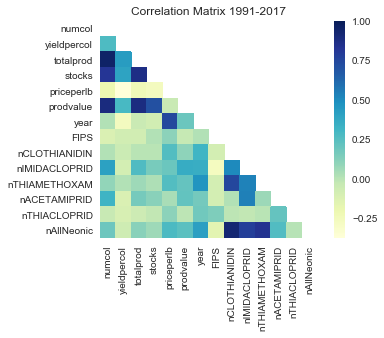

In [109]:
# correlation matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax= 1, square=True,  cmap="YlGnBu")
    plt.title('Correlation Matrix 1991-2017')
    plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/Corr_all.png")
    plt.show()

In [49]:
# correlation between total production and use of Neonic pesticides 
correlation = df['totalprod'].corr(df['nAllNeonic']).round(2)
correlation

0.12

In [50]:
# correlation between yield and use of Neonic pesticides 
correlation2 = df['yieldpercol'].corr(df['nAllNeonic']).round(2)
correlation2

-0.06

In [51]:
# correlation between number of colonies and use of Neonic pesticides 
correlation3 = df['numcol'].corr(df['nAllNeonic']).round(2)
correlation3

0.19

In [52]:
# correlation between number of colonies and total production
correlation4 = df['numcol'].corr(df['totalprod']).round(2)
correlation4

0.96

In [53]:
# correlation between number of colonies and yield
correlation4 = df['numcol'].corr(df['yieldpercol']).round(2)
correlation4

0.28

# Pre and post 2003 analysis
#use of neononic pesticides increased after 2003

In [54]:
# Splitting data by year as neononic pesticide use increased in 2003
databefore2003 = df[(df.year < 2003)]
databefore2003.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
9,AL,12000.0,86,1032000.0,103000.0,1.18,1218000.0,2002,Alabama,South,1,0.0,1178.8,840.4,0.0,0.0,2019.2
13,AL,14000.0,73,1022000.0,235000.0,0.72,736000.0,2001,Alabama,South,1,0.0,1490.8,0.0,0.0,0.0,1490.8


In [55]:
dataafter2003 = df[(df.year >= 2003)]
dataafter2003.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
7,AL,11000.0,56,616000.0,209000.0,1.49,918000.0,2007,Alabama,South,1,7696.2,3258.1,4149.6,0.0,0.0,15103.9
8,AL,11000.0,72,792000.0,230000.0,1.21,958000.0,2006,Alabama,South,1,680.0,4230.2,5371.6,0.0,0.0,10281.8
10,AL,12000.0,87,1044000.0,282000.0,1.41,1472000.0,2004,Alabama,South,1,2676.4,1323.9,3863.9,0.0,0.0,7864.2
11,AL,13000.0,66,858000.0,266000.0,1.02,875000.0,2005,Alabama,South,1,1503.6,994.5,5493.9,0.0,0.0,7992.0
12,AL,13000.0,82,1066000.0,43000.0,1.24,1322000.0,2003,Alabama,South,1,0.0,668.3,591.7,0.0,0.0,1260.0


In [56]:
# correlation before 2003
corr1 = databefore2003.corr()
corr1

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
numcol,1.000000,0.358135,0.957725,0.818383,-0.310792,0.929071,-0.024667,-0.205182,NaN,0.654497,0.139857,0.176419,NaN,0.656200
yieldpercol,0.358135,1.000000,0.508085,0.464600,-0.293304,0.457113,-0.021375,-0.109266,NaN,0.082384,-0.010366,-0.040847,NaN,0.078848
totalprod,0.957725,0.508085,1.000000,0.861243,-0.324849,0.939482,-0.029530,-0.170298,NaN,0.574159,0.062892,0.094738,NaN,0.570187
stocks,0.818383,0.464600,0.861243,1.000000,-0.341563,0.778512,0.029524,-0.037876,NaN,0.450361,-0.019324,0.009807,NaN,0.441120
priceperlb,-0.310792,-0.293304,-0.324849,-0.341563,1.000000,-0.175931,0.306034,0.152862,NaN,-0.149184,0.206775,0.100889,NaN,-0.131116
prodvalue,0.929071,0.457113,0.939482,0.778512,-0.175931,1.000000,0.043249,-0.146777,NaN,0.546009,0.208334,0.210686,NaN,0.554837
year,-0.024667,-0.021375,-0.029530,0.029524,0.306034,0.043249,1.000000,0.015091,NaN,0.037426,0.318009,0.155603,NaN,0.060209
FIPS,-0.205182,-0.109266,-0.170298,-0.037876,0.152862,-0.146777,0.015091,1.000000,NaN,-0.226464,-0.092635,0.012682,NaN,-0.227066
nCLOTHIANIDIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nIMIDACLOPRID,0.654497,0.082384,0.574159,0.450361,-0.149184,0.546009,0.037426,-0.226464,NaN,1.000000,0.168349,0.176877,NaN,0.996849


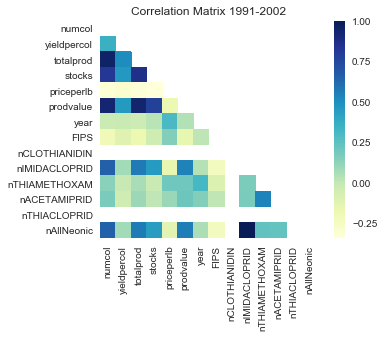

In [110]:
# correlation matrix pre 2003
mask = np.zeros_like(corr1)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr1, mask=mask, vmax=1, square=True, cmap="YlGnBu")
    plt.title('Correlation Matrix 1991-2002')
    plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/Corr_pre.png")
    plt.show()

In [58]:
#correlation between total production and use of Neonic pesticides 
correlation5 = databefore2003['totalprod'].corr(databefore2003['nAllNeonic']).round(2)
correlation5

0.57

In [59]:
#correlation between yield and use of Neonic pesticides 
correlation6 = databefore2003['yieldpercol'].corr(databefore2003['nAllNeonic']).round(2)
correlation6

0.08

In [60]:
#correlation between number of colonies and use of Neonic pesticides 
correlation7 = databefore2003['numcol'].corr(databefore2003['nAllNeonic']).round(2)
correlation7

0.66

In [61]:
# correlation between number of colonies and total production
correlation8 = databefore2003['numcol'].corr(databefore2003['totalprod']).round(2)
correlation8

0.96

In [62]:
# correlation between number of colonies and yield
correlation9 = databefore2003['numcol'].corr(databefore2003['yieldpercol']).round(2)
correlation9

0.36

In [63]:
# correlation before 2003
corr2 = dataafter2003.corr()
corr2

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
numcol,1.000000,0.246557,0.959745,0.836977,-0.261423,0.925851,0.031064,-0.066932,0.024581,0.403911,0.116524,0.390478,-0.043566,0.197084
yieldpercol,0.246557,1.000000,0.383383,0.340814,-0.357009,0.328757,-0.189497,-0.058501,0.017459,-0.048589,0.182248,-0.098871,-0.088381,0.024284
totalprod,0.959745,0.383383,1.000000,0.872534,-0.262278,0.951659,-0.007435,-0.016284,0.019253,0.262694,0.124365,0.227854,-0.063157,0.138150
stocks,0.836977,0.340814,0.872534,1.000000,-0.280520,0.789149,-0.060180,0.065397,0.028898,0.144540,0.091662,0.178362,-0.007280,0.094901
priceperlb,-0.261423,-0.357009,-0.262278,-0.280520,1.000000,-0.150383,0.648551,0.137032,0.147021,0.067604,0.027567,-0.091917,0.004196,0.113499
prodvalue,0.925851,0.328757,0.951659,0.789149,-0.150383,1.000000,0.146009,0.001000,0.072218,0.307270,0.178767,0.202980,-0.040246,0.195498
year,0.031064,-0.189497,-0.007435,-0.060180,0.648551,0.146009,1.000000,0.024776,0.197124,0.258045,0.243807,0.003381,0.042608,0.257973
FIPS,-0.066932,-0.058501,-0.016284,0.065397,0.137032,0.001000,0.024776,1.000000,-0.109134,-0.314570,-0.121175,-0.112346,0.182606,-0.202820
nCLOTHIANIDIN,0.024581,0.017459,0.019253,0.028898,0.147021,0.072218,0.197124,-0.109134,1.000000,0.491934,0.731134,-0.035231,-0.062418,0.922093
nIMIDACLOPRID,0.403911,-0.048589,0.262694,0.144540,0.067604,0.307270,0.258045,-0.314570,0.491934,1.000000,0.497917,0.538762,-0.079038,0.770190


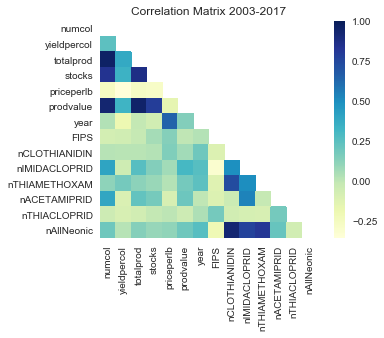

In [111]:
# correlation matrix post 2003
mask = np.zeros_like(corr2)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr2, mask=mask, vmax=1, square=True, cmap="YlGnBu")
    plt.title('Correlation Matrix 2003-2017')
    plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/Corr_post.png")
    plt.show()

In [65]:
#correlation between total production and use of Neonic pesticides 
correlation10 = dataafter2003['totalprod'].corr(dataafter2003['nAllNeonic']).round(2)
correlation10

0.14

In [66]:
#correlation between yield and use of Neonic pesticides 
correlation11 = dataafter2003['yieldpercol'].corr(dataafter2003['nAllNeonic']).round(2)
correlation11

0.02

In [67]:
#correlation between number of colonies and use of Neonic pesticides 
correlation12 = dataafter2003['numcol'].corr(dataafter2003['nAllNeonic']).round(2)
correlation12

0.2

In [68]:
# correlation between number of colonies and total production
correlation13 =dataafter2003['numcol'].corr(dataafter2003['totalprod']).round(2)
correlation13

0.96

In [69]:
# correlation between number of colonies and yield
correlation14 = dataafter2003['numcol'].corr(dataafter2003['yieldpercol']).round(2)
correlation14

0.25

# Regression model 

In [112]:
import statsmodels.api as sm

from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# All years

In [113]:
#Run linear regression on Neononic Pesticides and  Number of Colonies 
pest_col = ols("numcol ~ nAllNeonic", data = df).fit()
pest_col = pest_col.summary()
#results = sales_model_name_all.fit()
pest_col

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 numcol   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     33.44
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           1.01e-08
Time:                        16:27:54   Log-Likelihood:                -11483.
No. Observations:                 895   AIC:                         2.297e+04
Df Residuals:                     893   BIC:                         2.298e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.382e+04   3398.252     15.838      0.000    4.72e+04    6.05e+04
nAllNeonic     0.3707      0.064      5.783      0.000       0.245       0.497
==============================================================================
Omnibus:                      481.380   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2755.473
Skew:                           2.508   Prob(JB):                         0.00
Kurtosis:                       9.981   Cond. No.                     5.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
#Neononic Pesticides and  Yield per col
pest_y = ols("yieldpercol ~ nAllNeonic", data = df).fit()
pest_y = pest_y.summary()
#results = sales_model_name_all.fit()
pest_y

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            yieldpercol   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.113
Date:                Thu, 31 Jan 2019   Prob (F-statistic):             0.0780
Time:                        16:29:09   Log-Likelihood:                -3889.2
No. Observations:                 895   AIC:                             7782.
Df Residuals:                     893   BIC:                             7792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.2754      0.702     87.276      0.000      59.898      62.653
nAllNeonic -2.337e-05   1.32e-05     -1.764      0.078   -4.94e-05    2.63e-06
==============================================================================
Omnibus:                       49.947   Durbin-Watson:                   0.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.018
Skew:                           0.592   Prob(JB):                     4.16e-13
Kurtosis:                       3.359   Cond. No.                     5.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Pre 2003

In [117]:
# PRE 2003
#Neononic Pesticides and  Number of Colonies 

pest_c_pre = ols("numcol ~ nAllNeonic", data= databefore2003).fit()
pest_c_pre = pest_c_pre.summary()
#results = sales_model_name_all.fit()
pest_c_pre

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 numcol   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     260.1
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           5.58e-44
Time:                        16:31:33   Log-Likelihood:                -4328.0
No. Observations:                 346   AIC:                             8660.
Df Residuals:                     344   BIC:                             8668.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.646e+04   3859.187      9.448      0.000    2.89e+04    4.41e+04
nAllNeonic     7.6655      0.475     16.129      0.000       6.731       8.600
==============================================================================
Omnibus:                      141.426   Durbin-Watson:                   0.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.300
Skew:                           1.835   Prob(JB):                    1.03e-108
Kurtosis:                       7.585   Cond. No.                     8.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
#Neononic Pesticides and  Yield per col
pest_y_pre = ols("yieldpercol ~ nAllNeonic", data= databefore2003).fit()
pest_y_pre = pest_y_pre.summary()
#results = sales_model_name_all.fit()
pest_y_pre

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            yieldpercol   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.152
Date:                Thu, 31 Jan 2019   Prob (F-statistic):              0.143
Time:                        16:31:45   Log-Likelihood:                -1521.9
No. Observations:                 346   AIC:                             3048.
Df Residuals:                     344   BIC:                             3056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.3832      1.160     56.381      0.000      63.102      67.664
nAllNeonic     0.0002      0.000      1.467      0.143   -7.14e-05       0.000
==============================================================================
Omnibus:                       15.758   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.621
Skew:                           0.506   Prob(JB):                     0.000246
Kurtosis:                       3.358   Cond. No.                     8.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Post 2003

In [120]:
# Post 2003
#Neononic Pesticides and  Number of Colonies 

pest_c_pre = ols("numcol ~ nAllNeonic", data= dataafter2003).fit()
pest_c_pre = pest_c_pre.summary()
#results = sales_model_name_all.fit()
pest_c_pre

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 numcol   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     22.11
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           3.27e-06
Time:                        16:32:10   Log-Likelihood:                -7061.3
No. Observations:                 549   AIC:                         1.413e+04
Df Residuals:                     547   BIC:                         1.414e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.105e+04   4795.533     10.646      0.000    4.16e+04    6.05e+04
nAllNeonic     0.3346      0.071      4.702      0.000       0.195       0.474
==============================================================================
Omnibus:                      304.595   Durbin-Watson:                   0.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1701.309
Skew:                           2.526   Prob(JB):                         0.00
Kurtosis:                       9.990   Cond. No.                     8.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
#Neononic Pesticides and  Yield per col
pest_y_pre = ols("yieldpercol ~ nAllNeonic", data= dataafter2003).fit()
pest_y_pre = pest_y_pre.summary()
#results = sales_model_name_all.fit()
pest_y_pre

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            yieldpercol   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3228
Date:                Thu, 31 Jan 2019   Prob (F-statistic):              0.570
Time:                        16:32:35   Log-Likelihood:                -2339.5
No. Observations:                 549   AIC:                             4683.
Df Residuals:                     547   BIC:                             4692.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.0531      0.882     64.667      0.000      55.320      58.786
nAllNeonic  7.439e-06   1.31e-05      0.568      0.570   -1.83e-05    3.32e-05
==============================================================================
Omnibus:                       33.429   Durbin-Watson:                   0.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.886
Skew:                           0.631   Prob(JB):                     5.93e-09
Kurtosis:                       3.257   Cond. No.                     8.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""